# **Group 6 Superstore Project**

## **Problem Identification**

A Superstore Giant is interested in determining what would work best for them given the rising needs and fierce competition in the market. 

They want to know which products, regions, categories, and consumer segments they ought to concentrate on or steer clear of.

Additionally, they are interested in learning what their profit projections are.

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import rcParams
import seaborn as sns
from sklearn.datasets import load_diabetes 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML

## **EPLORE THE DATASET**

In [ ]:
#Loading the dataset
df = pd.read_csv('Sample - Superstore.csv', encoding = 'windows-1254')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
#Checking for the shape of our dataset
rows,columns=df.shape[0],df.shape[1]
display(HTML(f"<p>There are {rows} rows and {columns} columns.</p>"))

In [ ]:
#Checking for duplicate values
no_of_duplicates = df.duplicated().sum()
display(HTML(f"<p>There are {no_of_duplicates} duplicates.</p>"))

In [ ]:
#Basic statistics of our dataset
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#removing columns we don't require for our analysis  
data = df.drop(["Row ID", "Order ID", "Order Date", "Ship Date", "Customer ID", "Customer Name", "Postal Code", "Product ID", "Country"], axis = "columns")
data

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## **Univariate analysis**

In [ ]:
data["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

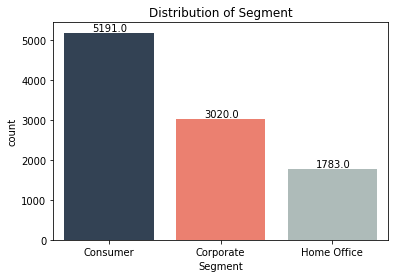

In [ ]:
ax = sns.countplot(x = data["Segment"], data = data, palette = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"])
plt.title("Distribution of Segment")

#Show the Segments' value counts on each bar.
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+50))
plt.show()

In [ ]:
data["Region"].value_counts(ascending = False)

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

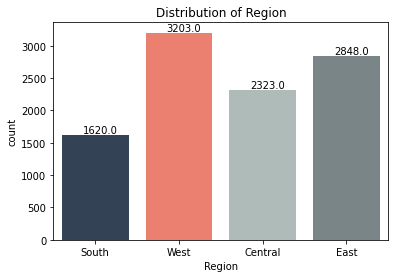

In [ ]:
ax = sns.countplot(x = data["Region"], data = data, palette = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"])
plt.title("Distribution of Region")

# Show the Regions' value counts on each bar.
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+25))
plt.show()

In [ ]:
data["Category"].value_counts(ascending = False)

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

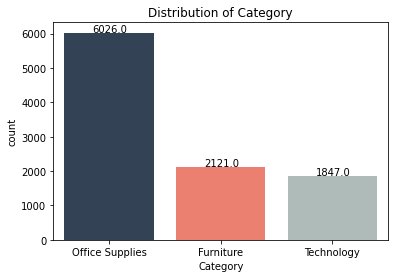

In [ ]:
ax = sns.countplot(x = data["Category"], data = data, palette = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"], order = ["Office Supplies", "Furniture", "Technology"])
plt.title("Distribution of Category")

# Show the category's value counts on each bar.
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+30))
plt.show()

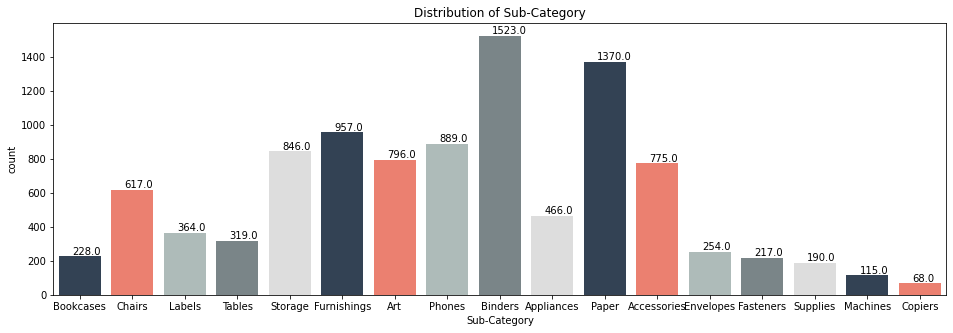

In [ ]:
fig, ax = plt.subplots(figsize = (16, 5))
ax = sns.countplot(x = data["Sub-Category"], data = data, palette = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"])
plt.title("Distribution of Sub-Category")

# Show the ub-Category's value counts on each bar.
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+10))
plt.show()

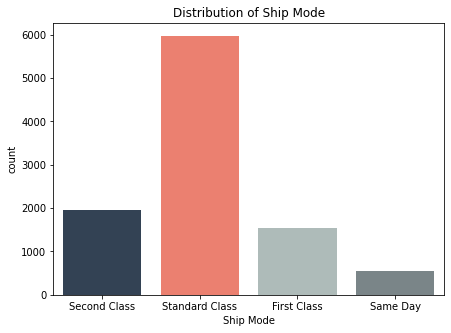

In [ ]:
# Set figsize
fig, ax = plt.subplots(figsize = (7, 5))
ax = sns.countplot(x = data["Ship Mode"], data = data, palette = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"])
plt.title("Distribution of Ship Mode")
plt.show()

In [ ]:
data["City"].value_counts(ascending = False)

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

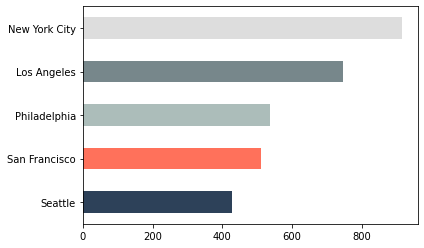

In [ ]:
colors = colors = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"]
data["City"].value_counts(ascending= True).tail(5).plot.barh(color = colors)
plt.show()

In [ ]:
data["Product Name"].value_counts(ascending = False)

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

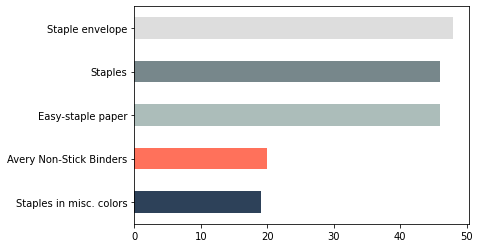

In [ ]:
colors = colors = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"]
data["Product Name"].value_counts(ascending= True).tail(5).plot.barh(color = colors)
plt.show()

### **Observation:**

1. The Consumer category makes up the majority of the clientele.

2. The East and West regions see the majority of purchases as opposed to the South and Central.

3. The most popular purchase in the category section is office supplies.

4. In terms of Product Sub-Category, Binders and Paper are in the lead.

5. The Standard Class Shipment option is preferred by the majority of customers.

6. New York City leads all cities in terms of the number of purchases made, followed by Los Angeles.

7. New California records the second-highest number of purchases behind New York among all the states.

8. The product with the most purchase is staple envelope

## **Bivariant Analysis**

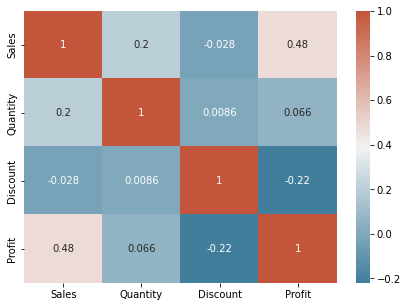

In [ ]:
#Visualize correlation between variables
fig, ax = plt.subplots(figsize = (7, 5))
cmap = sns.diverging_palette(230, 20, as_cmap = True, center = "light")
sns.heatmap(data.corr(), annot = True, cmap = cmap)
plt.show()

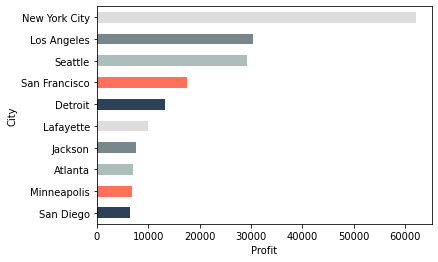

In [ ]:
#Bar chart showing cities with most profit
colors = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"]
data.groupby('City')['Profit'].sum().sort_values(ascending=True).tail(10).plot.barh(color=colors);
plt.xlabel("Profit")
plt.show()

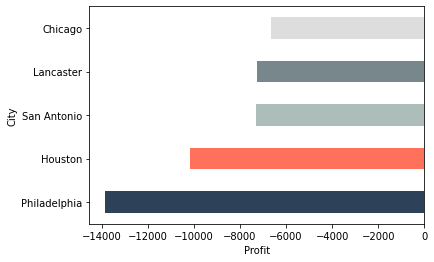

In [ ]:
#Bar chart showing bottom 5 cities with losses
colors = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"]
data.groupby('City')['Profit'].sum().sort_values(ascending=True).head(5).plot.barh(color=colors);
plt.xlabel("Profit")
plt.show()

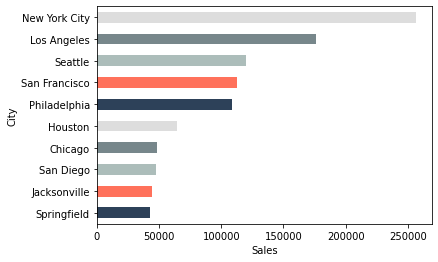

In [ ]:
#bar chart showing cities with most sales
colors = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"]
data.groupby('City')['Sales'].sum().sort_values(ascending=True).tail(10).plot.barh(color=colors);
plt.xlabel("Sales")
plt.show()

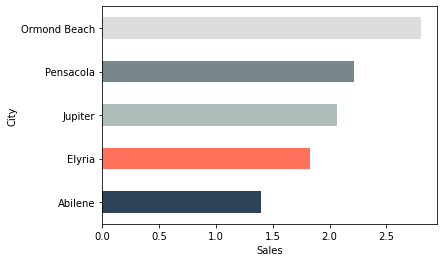

In [ ]:
#bar chart showing cities with least sales.
colors = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"]
data.groupby('City')['Sales'].sum().sort_values(ascending=True).head(5).plot.barh(color=colors);
plt.xlabel("Sales")
plt.show()

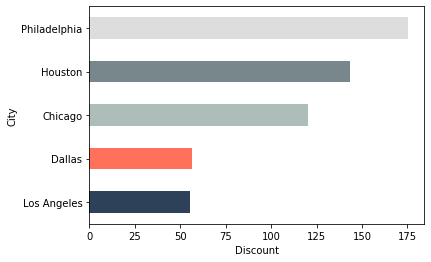

In [ ]:
colors = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"]
data.groupby('City')['Discount'].sum().sort_values(ascending=True).tail(5).plot.barh(color=colors);
plt.xlabel("Discount")
plt.show()

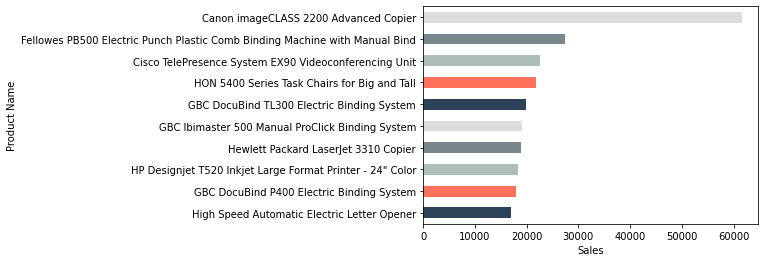

In [ ]:
#Bar chart showing Products with most sales
colors = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"]
data.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).tail(10).plot.barh(color = colors);
plt.xlabel("Sales")
plt.show()

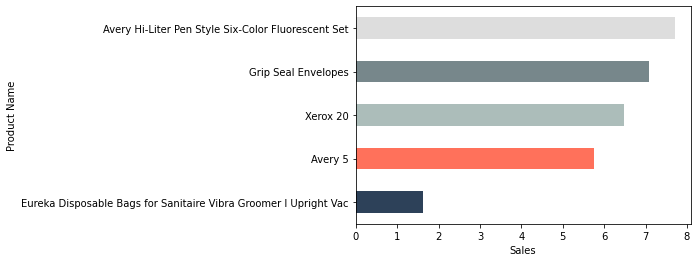

In [ ]:
#Bar chart showing products with least sales
colors = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"]
data.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).head(5).plot.barh(color=colors);
plt.xlabel("Sales")
plt.show()

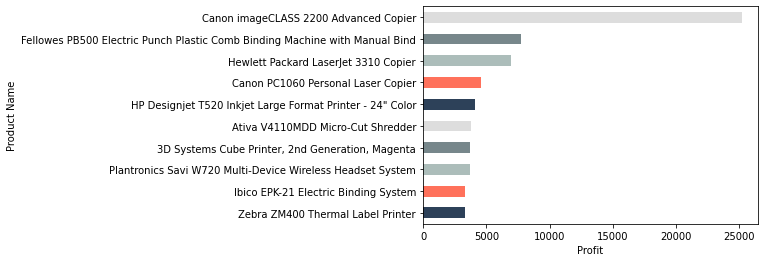

In [ ]:
#Bar chart showing Products with most profits
colors = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"]
data.groupby('Product Name')['Profit'].sum().sort_values(ascending=True).tail(10).plot.barh(color = colors);
plt.xlabel("Profit")
plt.show()

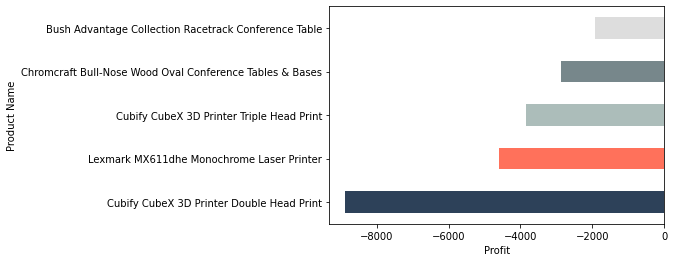

In [ ]:
#Bar chart showing Products with losses
colors = ["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"]
data.groupby('Product Name')['Profit'].sum().sort_values(ascending=True).head(5).plot.barh(color=colors);
plt.xlabel("Profit")
plt.show()

### **Observation:**

1. The cities with the highest profits are New York City, Los Angeles, Seattle, San Francisco, and Detroit, whereas the cities with the most losses are Philadelphia, Houston, San Antonio, Lancaster, and Chicago.

2. The Eureka Disposable bags for Sanitaire Vibra Groomer I Upright Vac, Avery 5, Xerox, Grip Seal Envelopes, and very Hi-Liter Pen Style Six-Color Fluorescent Set are the least sold items, while the Canon imageCLASS 2200 Advanced Copier has the most sales and profits. The least profitable products include the Cubify Cubex 3Dprinter Triple Head, Cubify Cubex 3Dprinter Double Head, Lexmark MX611dhe Monochrome Laser Printer, Chromecraft Bull-Nose Wood Oval Conference Tables & Bases, and Bush Advantage Collection Racetrack Conference Table.

3. In terms of sales, Philadelphia and Houston are among the top cities, yet they suffer the most losses.

4. Philadelphia, Houston, Chicago, Dallas, and Los Angeles had the highest discounts.

5. Philadelphia, Houston, and Chicago were among the cities that experienced losses, and these cities also had higher sales discounts.

## **Multivariate Analysis**

In [ ]:
#Grouping category by profit
grouped_category = data.groupby('Category').sum().sort_values(ascending = False, by = 'Profit')
grouped_category

,Sales,Quantity,Discount,Profit
Category,,,,
Technology,836154.0330,6939,244.40,145454.9481
Office Supplies,719047.0320,22906,947.80,122490.8008
Furniture,741999.7953,8028,368.89,18451.2728


In [ ]:
#Grouping segment by profit
grouped_segment = data.groupby('Segment').sum().sort_values(ascending = False, by = 'Profit')
grouped_segment

,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,1.161401e+06,19521,820.91,134119.2092
Corporate,7.061464e+05,11608,477.85,91979.1340
Home Office,4.296531e+05,6744,262.33,60298.6785


In [ ]:
#Grouping region by profit
grouped_region = data.groupby('Region').sum().sort_values(ascending = False, by = 'Profit')
grouped_region

,Sales,Quantity,Discount,Profit
Region,,,,
West,725457.8245,12266,350.20,108418.4489
East,678781.2400,10618,414.00,91522.7800
South,391721.9050,6209,238.55,46749.4303
Central,501239.8908,8780,558.34,39706.3625


In [ ]:
#Grouping sub-category by profit
grouped_sub_category = data.groupby('Sub-Category').sum().sort_values(ascending = False, by = 'Profit')
grouped_sub_category

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Copiers,149528.0300,234,11.00,55617.8249
Phones,330007.0540,3289,137.40,44515.7306
Accessories,167380.3180,2976,60.80,41936.6357
Paper,78479.2060,5178,102.60,34053.5693
Binders,203412.7330,5974,567.00,30221.7633
Chairs,328449.1030,2356,105.00,26590.1663
Storage,223843.6080,3158,63.20,21278.8264
Appliances,107532.1610,1729,77.60,18138.0054
Furnishings,91705.1640,3563,132.40,13059.1436


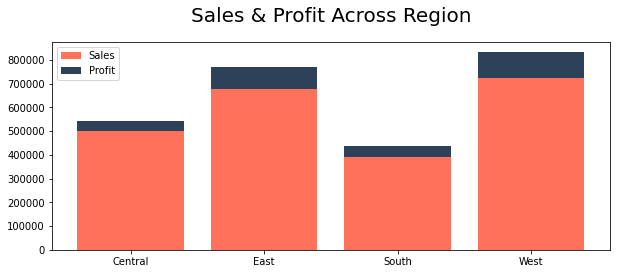

In [ ]:
#Visualization of sales and profit across regions
df_region = data[['Region','Sales','Profit']]
df_region = df_region.groupby(['Region']).sum().reset_index()

plt.figure(figsize=[10,13])
plt.subplot(3,1,1)
plt.bar(x=df_region['Region'], height=df_region['Sales'], color='#ff715b')
plt.bar(x=df_region['Region'], height=df_region['Profit'], bottom=df_region['Sales'], color='#2d4159')
plt.title("Sales & Profit Across Region", size=20, pad=20)
plt.legend(['Sales','Profit'])

plt.show()

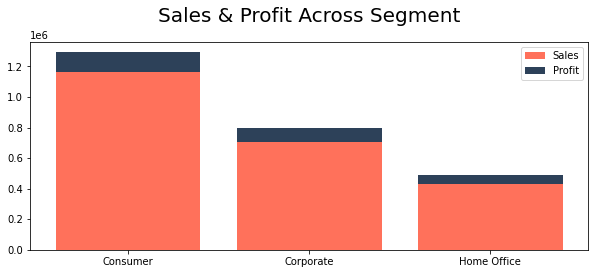

In [ ]:
#Visualization of sales and profit across segments
df_segment = data[['Segment','Sales','Profit']]
df_segment = df_segment.groupby(['Segment']).sum().reset_index()

plt.figure(figsize=[10,13])
plt.subplot(3,1,1)
plt.bar(x=df_segment['Segment'], height=df_segment['Sales'], color='#ff715b')
plt.bar(x=df_segment['Segment'], height=df_segment['Profit'], bottom=df_segment['Sales'], color='#2d4159')
plt.title("Sales & Profit Across Segment", size=20, pad=20)
plt.legend(['Sales','Profit'])

plt.show()

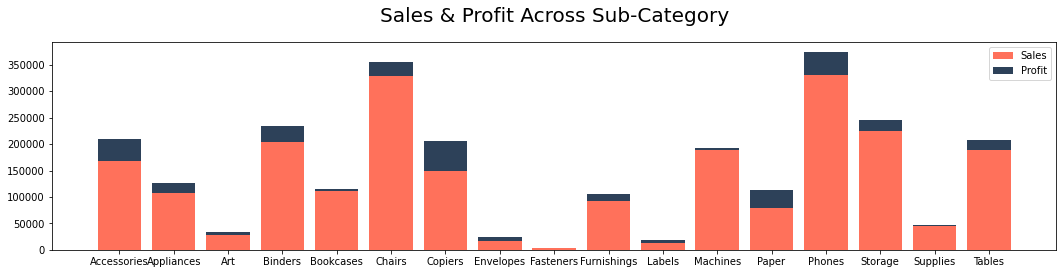

In [ ]:
#Visualization of sales and profit across sub-category
df_sub_category = data[['Sub-Category','Sales','Profit']]
df_sub_category = df_sub_category.groupby(['Sub-Category']).sum().reset_index()

plt.figure(figsize=[18,13])
plt.subplot(3,1,1)
plt.bar(x=df_sub_category['Sub-Category'], height=df_sub_category['Sales'], color='#ff715b')
plt.bar(x=df_sub_category['Sub-Category'], height=df_sub_category['Profit'], bottom=df_sub_category['Sales'], color='#2d4159')
plt.title("Sales & Profit Across Sub-Category", size=20, pad=20)
plt.legend(['Sales','Profit'])

plt.show()

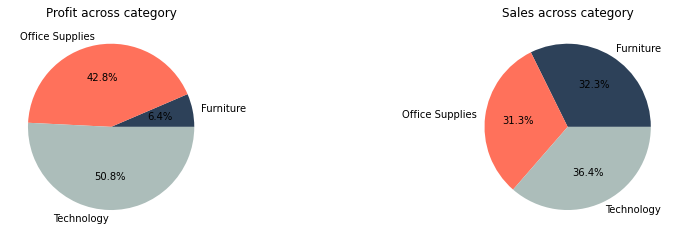

In [ ]:
#Visualization of sales and profit across categories
plt.figure(figsize=[15,13])
df_pie = data[['Category','Sales','Profit']]
df_pie = df_pie.groupby(['Category']).sum().reset_index()

plt.subplot(3,2,3)
plt.pie(df_pie['Profit'], labels=df_pie['Category'], colors=["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"], autopct='%1.1f%%')
plt.title("Profit across category")

plt.subplot(3,2,4)
plt.pie(df_pie['Sales'], labels=df_pie['Category'], colors=["#2d4159", "#ff715b", "#acbdba", "#77878b", "#DDDDDD"], autopct='%1.1f%%')
plt.title("Sales across category")

plt.show()

## **Observation:**

1. In terms of profit, the west is in the lead, followed by the east region
2. More sales and profits were generated by the consumer segment.
3. The most lucrative products were phones and copiers.
4. The technology sector generated higher revenue and sales.
5. Despite having lots of sales, the furniture category didn't make a lot of money.

## **Building Models**

In [ ]:
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# Split data into two datasets y - depedent variable, X - independent variables 

X = data.drop(['Profit'], axis = "columns")
y = data['Profit']

#### **Label encoding**

In [ ]:
#Convert categorical data to numerical data
X1 = X.select_dtypes('object')
for col in X1.columns:
    lb = LabelEncoder()
    X[col] = lb.fit_transform(X1[col].values)
X

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount
0,2,0,194,15,2,0,4,386,261.9600,2,0.00
1,2,0,194,15,2,0,5,839,731.9400,3,0.00
2,2,1,266,3,3,1,10,1433,14.6200,2,0.00
3,3,0,153,8,2,0,16,366,957.5775,5,0.45
4,3,0,153,8,2,1,14,573,22.3680,2,0.20
...,...,...,...,...,...,...,...,...,...,...,...
9989,2,0,295,8,2,0,9,1586,25.2480,3,0.20
9990,3,0,104,3,3,0,9,1535,91.9600,2,0.00
9991,3,0,104,3,3,2,13,47,258.5760,2,0.20
9992,3,0,104,3,3,1,12,929,29.6000,4,0.00


In [ ]:
# randomly divide the data in a training and testing set.
# set the test data size to be 30% of the total dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.30, random_state = 0)

In [ ]:
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 6995 samples in the training set and 2999 samples in the test set


### **Linear Regression Model**

In [ ]:
#Create a Linear regression model
#Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Check the accuracy of our data
lr_model.score(X_test, y_test)

0.35386257029061297

In [ ]:
#predict Profit
lr_y_model = lr_model.predict(X_test)
lr_y_model

array([ 43.67325475,  59.70646847,   6.96840874, ..., 304.73621996,
        65.71235374,  10.92809255])

### **Decision Tree Regressor Model**

In [ ]:
#Create a Decision Tree Regressor model
#Train the model

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Check the accuracy of our data
dt_model.score(X_test, y_test)

0.6393729969349056

In [ ]:
#predict profit
dt_y_model = dt_model.predict(X_test)
dt_y_model

array([ 10.9698,   6.93  ,   2.4582, ..., 843.1706,  17.856 ,  19.194 ])

### **Random Forest Regressor Model**

In [ ]:
#Create a random forest regressor model
#Train the model
rfr_model = RandomForestRegressor(n_estimators = 150, max_depth =7, random_state = 0)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=150, random_state=0)

In [ ]:
#Check the accuracy of our data
rfr_model.score(X_test, y_test)

0.7635589400610621

In [ ]:
#predict profit
rfr_y_pred = rfr_model.predict(X_test)
rfr_y_pred

array([  7.32818797,   7.28422674,   9.44220405, ..., 662.59500983,
        19.0128348 ,  12.146931  ])

Recommendation:

1. The store concentrates on sales in the most profitable cities, such as New York City, Los Angeles, Seattle, San Francisco, and Detroit, and steer clear of Philadelphia, Houston, San Antonio, Lancaster, and Chicago.
2. They promote The Canon imageCLASS 2200 Advanced Copier more and steer clear of the Cubify Cubex 3Dprinter Triple Head, Cubify Cubex 3Dprinter Double Head, Lexmark MX611dhe Monochrome Laser Printer, Chromecraft Bull-Nose Wood Oval Conference Tables & Bases, and Bush Advantage Collection Racetrack Conference Table.
3. They ought to concentrate more on selling in the west and east, which generated more sales than the central and southern regions.
4. In cities where they had fewer sales, they should increase their advertising.
5. Given the increased demand for furniture, they should stock items with larger profit margins.
6. Since most losses come from cities with greater discounts, the company should run more advertisements that don't require freebies.